In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X, y = iris.data[:, :2], iris.target  

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
from sklearn.metrics import accuracy_score

#differnt values of k
print("K | Accuracy")
for k in range(1, 11):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    preds = knn_k.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{k} | {acc:.2f}")

K | Accuracy
1 | 0.71
2 | 0.73
3 | 0.84
4 | 0.76
5 | 0.80
6 | 0.82
7 | 0.80
8 | 0.78
9 | 0.82
10 | 0.76


Accuracy with K=3: 0.84


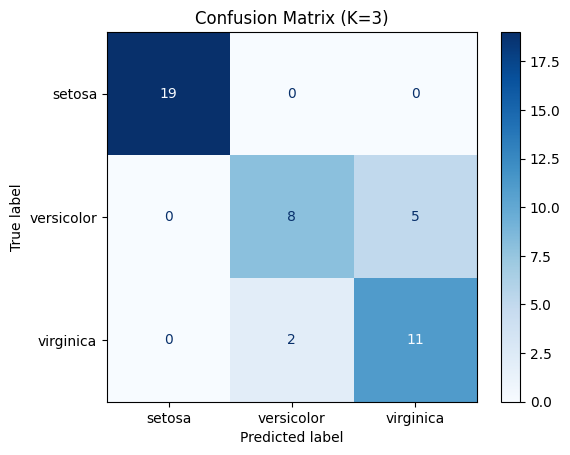

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

k = 3
knn_final = KNeighborsClassifier(n_neighbors=k)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

# Accuracy
print(f"Accuracy with K={k}: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix (K={k})')
plt.show()

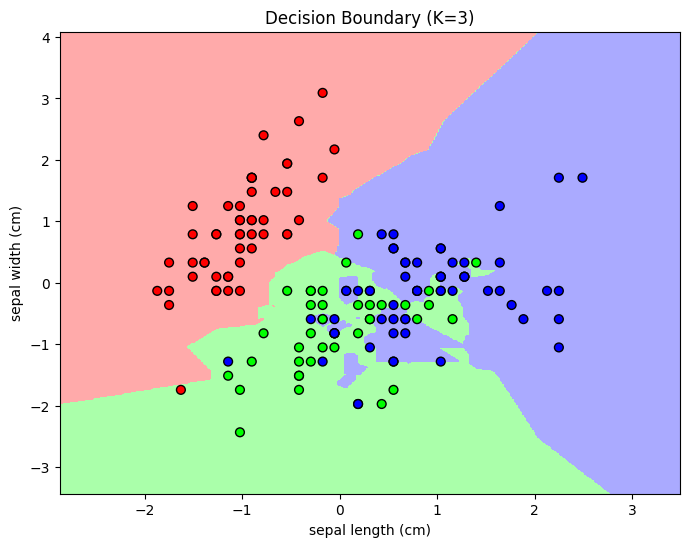

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_scaled, y, knn_final, f"Decision Boundary (K={k})")